In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [2]:
datos_antigua_full = pd.read_csv("datos_antigua.csv", delimiter=",", on_bad_lines='skip')
datos_nueva_full = pd.read_csv("datos_nueva.csv", delimiter=",", on_bad_lines='skip')

In [35]:
datos_antigua = datos_antigua_full.sample(n =100)
datos_nueva = datos_nueva_full.sample(n = 100)

In [36]:
datos_nueva.tail()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_490,eig_491,eig_492,eig_493,eig_494,eig_495,eig_496,eig_497,eig_498,eig_499
19806,1.0,0.0,0.954162,1.144254,1.166179,3.931728,0.283445,0.153780,0.0,0.0,...,187.317776,187.418574,187.496319,187.848129,188.350937,188.792761,189.074638,189.388779,189.418918,190.619283
8660,2.0,0.0,1.357683,2.951291,0.476641,1.078202,0.073694,0.222132,0.0,0.0,...,113.672199,113.723561,114.037412,114.190457,114.359198,114.776708,114.805742,115.067409,115.452348,115.480268
947,0.0,2.0,1.585744,0.838278,0.752280,0.796655,0.091054,0.091054,0.0,0.0,...,122.369762,122.773890,122.910311,123.477621,124.443823,124.538526,124.598908,124.602983,124.763722,124.913751
26509,1.0,1.0,0.621627,1.497713,1.367576,0.390882,0.226006,0.135673,0.0,0.0,...,120.661764,120.824209,120.948147,121.147507,121.262848,121.377918,121.444761,122.314566,122.430659,122.661176
23674,0.0,1.0,0.608426,1.813563,0.906275,3.395383,0.066360,0.256358,0.0,0.0,...,180.891432,181.194826,181.399683,181.497104,182.549124,183.497767,183.642700,184.113810,184.602827,184.758180


In [37]:
def normalizar(d_frame):
    for column in d_frame.keys()[2:]:
        if not sum(d_frame[column]) == 0:
            the_minimus = min(d_frame[column])
            the_maximus = max(d_frame[column])
            d_frame[column] = (d_frame[column] - the_minimus)/(the_maximus - the_minimus)
    #fin for
#fin función

In [38]:
def one_hottear(d_frame, cols_discretas):
    cols_nuevas = []
    for column in cols_discretas:
        posibles_valores = set(d_frame[column])
        for i in posibles_valores:
            d_frame[column + str(i)] = 0
            d_frame.loc[d_frame[column] == i, column + str(i)] = 1
            cols_nuevas.append(column + str(i))
        #fin for 
        del d_frame[column]
    #fin for 
    d_frame.loc[:, cols_nuevas + [col for col in d_frame.columns if col not in cols_nuevas]]
#fin función

In [39]:
normalizar(datos_antigua)
normalizar(datos_nueva)
datos_nueva.head()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_490,eig_491,eig_492,eig_493,eig_494,eig_495,eig_496,eig_497,eig_498,eig_499
29902,1.0,3.0,0.125270,0.334893,0.141183,0.959491,0.875127,0.874914,0.0,0.0,...,0.223236,0.223464,0.223235,0.223109,0.223718,0.220885,0.219184,0.218932,0.216019,0.216067
22795,2.0,0.0,0.202468,0.309604,0.150843,0.605552,0.053119,0.028848,0.0,0.0,...,0.266340,0.266399,0.266682,0.266694,0.265897,0.262385,0.260162,0.259055,0.255785,0.256619
22806,0.0,1.0,0.120825,0.546356,0.063464,0.842884,0.051945,0.031637,0.0,0.0,...,0.462228,0.461008,0.460843,0.461079,0.459977,0.455656,0.451212,0.449340,0.443893,0.444400
7777,2.0,3.0,0.195220,0.437570,0.109813,0.656516,0.685085,0.684547,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9769,2.0,3.0,0.267680,0.073871,0.366550,0.544197,0.522202,0.521386,0.0,0.0,...,0.175127,0.174949,0.174690,0.174503,0.173872,0.171868,0.170296,0.169574,0.168944,0.168776


In [40]:
one_hottear(datos_antigua, ["# Shape", "Cry_st"])
one_hottear(datos_nueva, ["# Shape", "Cry_st"])
datos_nueva.head()

/tmp/ipykernel_12289/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_frame[column + str(i)] = 0
/tmp/ipykernel_12289/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_frame[column + str(i)] = 0
/tmp/ipykernel_12289/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

,bx,by,bz,C00,C01,C02,C03,C04,C05,C11,...,eig_497,eig_498,eig_499,# Shape0.0,# Shape1.0,# Shape2.0,Cry_st0.0,Cry_st1.0,Cry_st2.0,Cry_st3.0
29902,0.125270,0.334893,0.141183,0.959491,0.875127,0.874914,0.0,0.0,0.0,0.960077,...,0.218932,0.216019,0.216067,0,1,0,0,0,0,1
22795,0.202468,0.309604,0.150843,0.605552,0.053119,0.028848,0.0,0.0,0.0,0.625549,...,0.259055,0.255785,0.256619,0,0,1,1,0,0,0
22806,0.120825,0.546356,0.063464,0.842884,0.051945,0.031637,0.0,0.0,0.0,0.845155,...,0.449340,0.443893,0.444400,1,0,0,0,1,0,0
7777,0.195220,0.437570,0.109813,0.656516,0.685085,0.684547,0.0,0.0,0.0,0.661481,...,0.000000,0.000000,0.000000,0,0,1,0,0,0,1
9769,0.267680,0.073871,0.366550,0.544197,0.522202,0.521386,0.0,0.0,0.0,0.550785,...,0.169574,0.168944,0.168776,0,0,1,0,0,0,1


In [41]:
# Para X tomaré N frecuencias (dadas po el usuario). Para "y" tomaré un CXX dado por el usuario
def info_mutua(N_freq_disp, Cobj, d_frame, opt = "Lineal"):
    if any("(omega^2)" in x for x in d_frame.keys()):
        key_str = "(omega^2)"
        N_col = 4
    elif any("eig" in x for x in d_frame.keys()):
        key_str = "eig"
        N_col = 3
    else:
        raise KeyError("No hay columnas llamadas eig_X o (omega^2)_X")
    #fin if 
    lista_ini = list(d_frame.keys()[:N_col]) + list(d_frame.keys()[-7:])
    lista_eig_raw = list(filter(lambda x: key_str in x, d_frame.keys()))
    if opt == "Log":
        indices_elegidos = np.logspace(0, np.log10(len(lista_eig_raw) - 1), N_freq_disp, dtype = int)
        indices_elegidos[0] = 0
        lista_eig = list(map(lambda x: key_str + "_" + str(x), indices_elegidos))
    else:
        lista_eig = lista_eig_raw[:N_freq_disp]
    #fin if 
    lista_X = lista_ini + lista_eig
    X = d_frame[lista_X]
    y = d_frame[Cobj]
    resp = mutual_info_regression(X, y, discrete_features=tuple(range(N_col, N_col+7)))
    return (resp, lista_X)
#fin función

In [42]:
N_disp = 10
target = "C00"
MI_antigua_info = info_mutua(N_disp, target, datos_antigua)
MI_nueva_info = info_mutua(N_disp, target, datos_nueva)
MI_antigua = MI_antigua_info[0]
MI_nueva = MI_nueva_info[0]
listaX_antigua = MI_antigua_info[1]
listaX_nueva = MI_nueva_info[1]

['Density', 'Lx', 'Ly', 'Lz', '# Shape0.0', '# Shape1.0', '# Shape2.0', 'Cry_st0.0', 'Cry_st1.0', 'Cry_st2.0', 'Cry_st3.0', '(omega^2)_0', '(omega^2)_1', '(omega^2)_2', '(omega^2)_3', '(omega^2)_4', '(omega^2)_5', '(omega^2)_6', '(omega^2)_7', '(omega^2)_8', '(omega^2)_9']
[0.         0.08050795 0.07973183 0.         0.         0.07498189
 0.         0.08214784 0.         0.         0.         0.02315907
 0.05539034 0.02161436 0.         0.00163052 0.00537457 0.0055461
 0.         0.01113275 0.04825845]


Text(0.5, 1.0, 'C00')

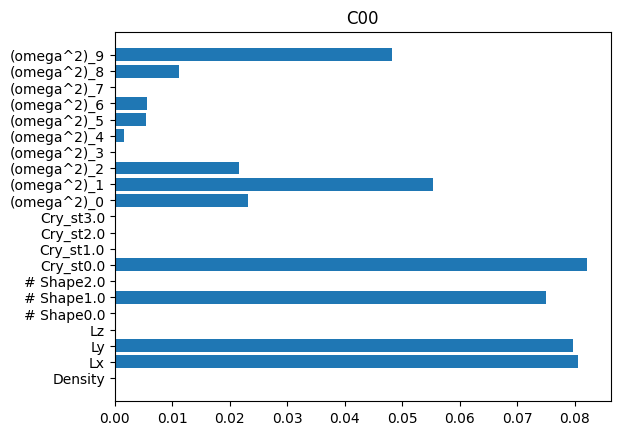

In [43]:
print(listaX_antigua)
print(MI_antigua)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.barh(listaX_antigua, MI_antigua)
ax1.set_title(target)

['bx', 'by', 'bz', '# Shape0.0', '# Shape1.0', '# Shape2.0', 'Cry_st0.0', 'Cry_st1.0', 'Cry_st2.0', 'Cry_st3.0', 'eig_0', 'eig_1', 'eig_2', 'eig_3', 'eig_4', 'eig_5', 'eig_6', 'eig_7', 'eig_8', 'eig_9']
[0.03956922 0.         0.         0.05929639 0.12367975 0.05185646
 0.         0.         0.03190325 0.0661952  0.         0.04691154
 0.         0.         0.00634841 0.05194832 0.04211342 0.04180251
 0.06866509 0.00252568]


Text(0.5, 1.0, 'C00')

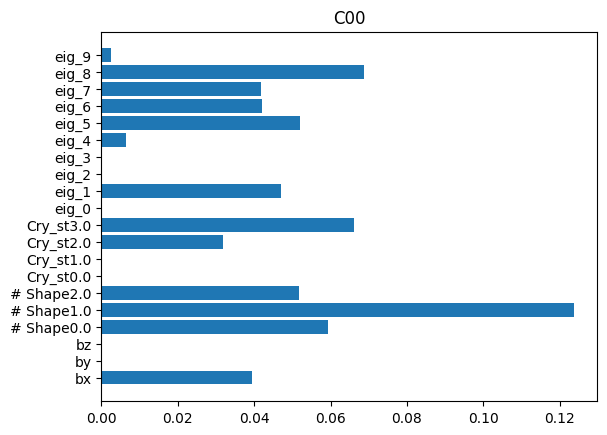

In [44]:
print(listaX_nueva)
print(MI_nueva)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.barh(listaX_nueva, MI_nueva)
ax2.set_title(target)